In [1]:
%matplotlib inline

import itertools
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn import svm, datasets
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
G=[ ["alternative","alternative rock","indie rock", "indie"], ["rock","alternative rock","pop rock"], ["punk","pop punk"], ["pop","indie pop"], ["r&b"],["grunge"],["metal","heavy metal","alternative metal"] ]

In [3]:
def getWords(topWordsFile):
    topwords = json.load(topWordsFile)
    wordCounter = Counter()
    artistasgenre={}
    for key in topwords.keys():
        for word in topwords[key]:
            wordCounter.update([word[0]])
    return list(wordCounter.keys())

In [4]:
artistasG=[]
for i in range(7):
    artistasG.append([])
    
with open('allSongResults.json') as data_file:
    songs = json.load(data_file)
    for i,arr in enumerate(G):
        for ind,song in enumerate(songs):
            if song['genre']!=song['genre'] :
                continue
            #generos.append(song['genre'].lower())
            if not song['genre'].lower() in arr:
                continue
            artistasG[i].append(song['artist'])
                         

In [5]:
ART=[ ["Linkin Park","Radiohead","Foo Fighters","Arctic Monkeys","The Smiths","Vampire Weekend","Muse"],
     ["The Strokes","The Cure","Evanescence","Bruce Springsteen","Elton John"],
     ["My Chemical Romance","Blink-182","Panic! at the Disco","Fall Out Boy","Green Day"] , 
     ["Taylor Swift","One Direction","fun.","Imagine Dragons","Katy Perry","Death Cab for Cutie" ],
     ["John Legend","Beyoncé","Rihanna","Stevie Wonder","Bruno Mars","Jason Derulo","Whitney Houston"],
     ["Alice in Chains","Nirvana","Soundgarden","Pearl Jam"],
     ["Deftones","System of a Down","Iron Maiden","Avenged Sevenfold","Metallica"] ]

In [6]:
allArt=[]
for i in ART:
    for j in i:
        allArt.append(j)
allArt

['Linkin Park',
 'Radiohead',
 'Foo Fighters',
 'Arctic Monkeys',
 'The Smiths',
 'Vampire Weekend',
 'Muse',
 'The Strokes',
 'The Cure',
 'Evanescence',
 'Bruce Springsteen',
 'Elton John',
 'My Chemical Romance',
 'Blink-182',
 'Panic! at the Disco',
 'Fall Out Boy',
 'Green Day',
 'Taylor Swift',
 'One Direction',
 'fun.',
 'Imagine Dragons',
 'Katy Perry',
 'Death Cab for Cutie',
 'John Legend',
 'Beyoncé',
 'Rihanna',
 'Stevie Wonder',
 'Bruno Mars',
 'Jason Derulo',
 'Whitney Houston',
 'Alice in Chains',
 'Nirvana',
 'Soundgarden',
 'Pearl Jam',
 'Deftones',
 'System of a Down',
 'Iron Maiden',
 'Avenged Sevenfold',
 'Metallica']

In [7]:
lims=[ (5,10),(5,10),(1,10),(5,10),(1,10),(5,10),(5,10) ]

In [8]:
for ind,it in enumerate(artistasG):
    D = Counter(it)
    for elem in D:
        if D[elem]>lims[ind][0] and D[elem]<lims[ind][1] :
            print(elem, D[elem])
    print("---")

The Smiths 9
Muse 7
R.E.M. 8
Arcade Fire 7
Foo Fighters 6
Brand New 6
The National 9
The Fray 8
Phoenix 7
Vampire Weekend 8
Bloc Party 6
Mew 6
Ween 7
---
Foo Fighters 6
Bruce Springsteen 7
The Strokes 9
Muse 7
The Doors 6
Scissor Sisters 8
Elton John 8
Phoenix 7
The Fray 8
R.E.M. 8
Mew 6
Ween 7
---
Simple Plan 3
The Wonder Years 4
Bad Religion 3
Hedley 2
NOFX 2
Flogging Molly 2
Bikini Kill 2
Yellowcard 2
Against Me! 2
All Time Low 5
Paramore 2
The Stranglers 2
Dead Kennedys 2
---
Foster the People 7
Taylor Swift 9
fun. 6
Katy Perry 6
---
Whitney Houston 2
Jason Derulo 2
Stevie Wonder 3
Rihanna 2
Beyoncé 4
John Legend 2
Bruno Mars 2
---
Soundgarden 7
---
Tool 8
Avenged Sevenfold 7
Iron Maiden 8
Deftones 6
Metallica 8
System of a Down 6
---


In [58]:
with open('allSongResults.json') as data_file:
    songs = json.load(data_file)
    artistas={}
    cant={}
    generos=[]
    clases=[]
    
    for ind,song in enumerate(songs):
        if song['genre']!=song['genre'] :
            continue
        generos.append(song['genre'].lower())
        if not  song['artist'] in allArt:
            continue
        if song["artist"]=='Katy Perry':
            print( song["name"])
        D=song['tags']
        act = []
        clases=[]
        for tag in D:
            act.append(D[tag])        
            clases.append(tag)
        act = np.array(act)    
        if song['artist'] in cant:
            cant[song['artist']]+=1
        else:
            cant[song['artist']]=1
            
        if song['artist'] in artistas:
            artistas[song['artist']] = np.sum( [ artistas[song['artist']], act ] ,axis=0 ) 
        else:
            artistas[song['artist']]= act
        artistas[song['artist']] = artistas[song['artist']]/np.sum(artistas[song['artist']])  
    print( Counter( generos ).most_common(50) )

I'm Still Breathing
Dark Horse
Wide Awake
Part of Me
Legendary Lovers
Firework
[(' followers', 484), ('alternative rock', 308), ('pop', 155), ('rock', 140), ('indie rock', 137), ('indie', 120), ('folk', 109), ('indie pop', 91), ('alternative', 83), ('pop punk', 79), ('progressive rock', 67), ('grunge', 52), ('folk rock', 47), ('hip hop', 43), ('alternative metal', 42), ('heavy metal', 41), ('new wave', 40), ('country', 38), ('pop rock', 33), ('moderate rock', 28), ('indie folk', 28), ('r&b', 26), ('hard rock', 25), ('pop/rock', 23), ('glam rock', 23), ('groove metal', 23), ('punk', 22), ('post hardcore', 19), ('rap', 19), ('progressive metal', 17), ('electropop', 16), ('blues folk', 15), ('psychedelic rock ', 14), ('metalcore', 14), ('art rock', 14), ('post punk', 13), ('shoegaze', 13), ('electronic', 13), ('industrial', 11), ('power metal', 11), ('emo', 11), ('synthpop', 10), ('alternative hip hop', 10), ('folk pop', 10), ('rap rock', 9), ('acoustic', 9), ('blues rock', 9), ('trip-hop

In [59]:
#para verlo mejor
for art in artistas:
    artistas[art][1]*=(0.4)
    artistas[art] = artistas[art]/np.sum(artistas[art]) 

In [60]:
artFin=[ [],[],[],[],[],[],[] ]
for ind,lart in enumerate(ART):
    for ind2,art in enumerate(lart):
        artFin[ind].append( artistas[art] )

In [61]:
mat=[]
artistlab=[]
tot=0
for it in artistas:
    if cant[it]>1 :
        mat.append(artistas[it])
        artistlab.append(it)
        tot+=1
print(tot)

39


In [47]:
def plot_confusion_matrix(cm, ylabels,xlabels,
                          normalize=True,
                          title='Distribución de clases por artista',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(classes))
    plt.xticks(np.arange(len(xlabels)), xlabels, rotation=45)
    plt.yticks(np.arange(len(ylabels)), ylabels)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, int(cm[i, j]*100)/100.0 if cm[i, j]>0.17 else "" ,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Artista')
    plt.xlabel('Clase')

Normalized confusion matrix
[[ 0.37075523  0.05667809  0.03309108  0.36208319  0.09254253  0.0848499 ]
 [ 0.08009874  0.04005414  0.03523452  0.65058594  0.14489219  0.04913448]
 [ 0.13656792  0.0528653   0.02031438  0.45347568  0.15703139  0.17974534]
 [ 0.07576459  0.02362799  0.03388145  0.73739098  0.07936434  0.04997065]
 [ 0.34531391  0.02720035  0.06118797  0.31386721  0.16112837  0.09130219]
 [ 0.06029416  0.01933346  0.66262727  0.1681908   0.05552065  0.03403366]
 [ 0.10213376  0.18470589  0.03603769  0.34828863  0.28245531  0.04637872]]


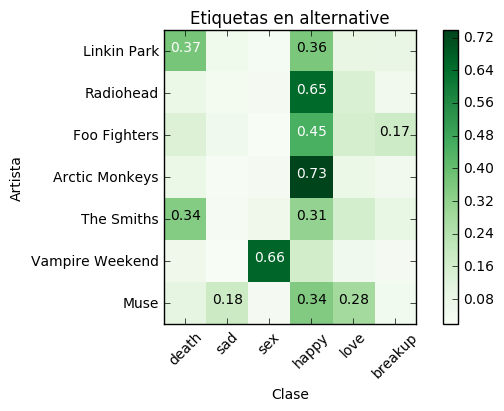

In [62]:
plot_confusion_matrix( np.array(artFin[0]),ART[0],clases,title="Etiquetas en %s"%G[0][0])

Normalized confusion matrix
[[ 0.13236543  0.03369369  0.22002883  0.45165741  0.09673789  0.06551675]
 [ 0.14267875  0.14503883  0.0302909   0.42381551  0.184958    0.07321802]
 [ 0.1997312   0.01899755  0.0154518   0.5306926   0.20094612  0.03418073]
 [ 0.11051724  0.01695967  0.02306608  0.79508793  0.04174218  0.01262691]
 [ 0.06711656  0.01734278  0.02884953  0.63203483  0.19227108  0.06238522]]


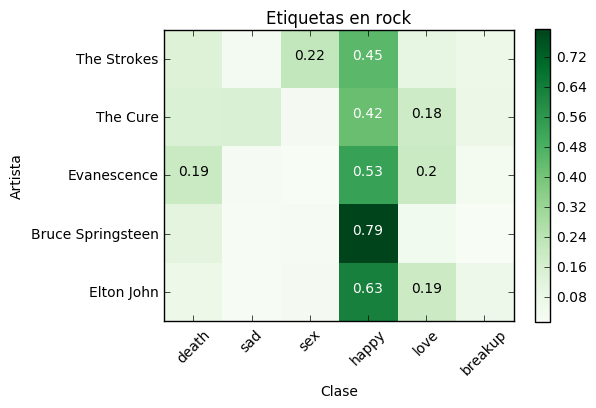

In [63]:
plot_confusion_matrix( np.array(artFin[1]),ART[1],clases,title="Etiquetas en %s"%G[1][0])

Normalized confusion matrix
[[ 0.45462701  0.03109874  0.02198885  0.28742654  0.12729267  0.07756619]
 [ 0.18403771  0.13853716  0.05012932  0.30353125  0.21672869  0.10703587]
 [ 0.05124069  0.02992515  0.02942836  0.73039912  0.13529799  0.02370868]
 [ 0.12061104  0.03750367  0.06594256  0.55012888  0.17062535  0.05518849]
 [ 0.08330205  0.02162615  0.0312191   0.78918105  0.05005845  0.02461319]]


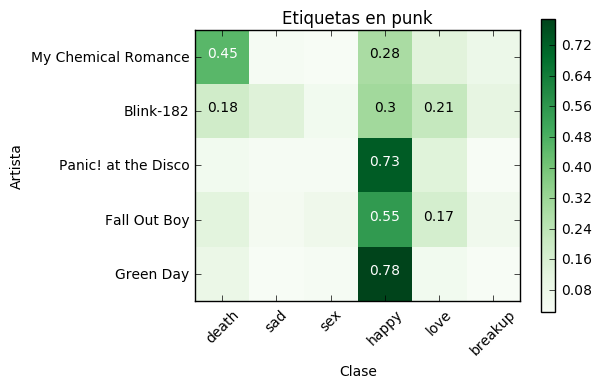

In [64]:
plot_confusion_matrix( np.array(artFin[2]),ART[2],clases,title="Etiquetas en %s"%G[2][0])

Normalized confusion matrix
[[ 0.08883038  0.06092594  0.04329639  0.63855382  0.08557668  0.08281678]
 [ 0.04967354  0.05524471  0.41515901  0.26215832  0.18330656  0.03445786]
 [ 0.12146118  0.15278008  0.03442743  0.54236918  0.09634799  0.05261414]
 [ 0.19984701  0.03767158  0.05814318  0.49918212  0.16943079  0.03572533]
 [ 0.11550345  0.02041794  0.03078395  0.64237722  0.08955906  0.10135839]
 [ 0.10616673  0.04818964  0.03244916  0.63282575  0.15519123  0.02517749]]


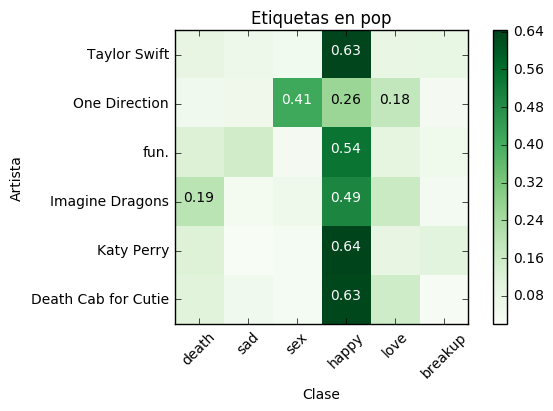

In [65]:
plot_confusion_matrix( np.array(artFin[3]),ART[3],clases,title="Etiquetas en %s"%G[3][0])

Normalized confusion matrix
[[ 0.04768498  0.02106454  0.02863969  0.48493427  0.33326912  0.0844074 ]
 [ 0.09492704  0.0291112   0.03150613  0.54596954  0.25514581  0.04334028]
 [ 0.09609793  0.04602192  0.03666794  0.58578122  0.16356458  0.0718664 ]
 [ 0.04069446  0.02467532  0.04170497  0.3312872   0.52949065  0.0321474 ]
 [ 0.06306764  0.03694496  0.1821875   0.25127936  0.43402016  0.03250039]
 [ 0.15671712  0.06559551  0.14727605  0.37695801  0.19225052  0.0612028 ]
 [ 0.12373069  0.02642115  0.01454438  0.23646296  0.56046017  0.03838064]]


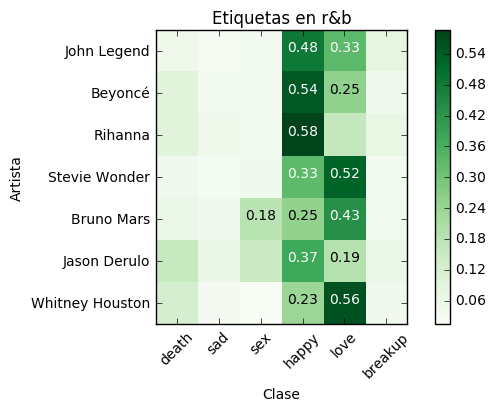

In [66]:
plot_confusion_matrix( np.array(artFin[4]),ART[4],clases,title="Etiquetas en %s"%G[4][0])

Normalized confusion matrix
[[ 0.09485813  0.02334093  0.03005113  0.68903747  0.13183304  0.0308793 ]
 [ 0.25650097  0.07664771  0.05521045  0.39059627  0.15317677  0.06786783]
 [ 0.36450924  0.03522408  0.17818278  0.31696026  0.06060473  0.04451892]
 [ 0.1068841   0.03394348  0.05609524  0.22849754  0.39605572  0.17852392]]


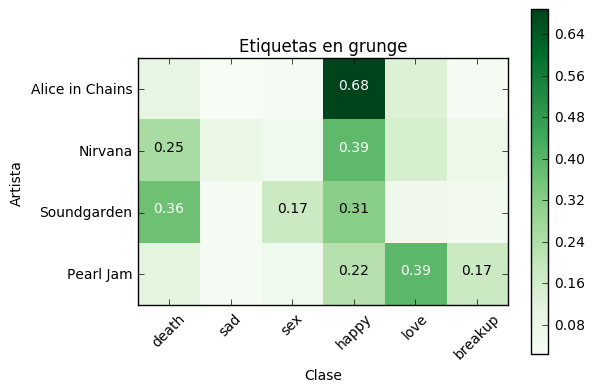

In [67]:
plot_confusion_matrix( np.array(artFin[5]),ART[5],clases,title="Etiquetas en %s"%G[5][0])

Normalized confusion matrix
[[ 0.05195051  0.02110844  0.40334421  0.44353489  0.05444546  0.02561649]
 [ 0.22593393  0.06099541  0.05574232  0.5027366   0.11044328  0.04414846]
 [ 0.37236662  0.08121198  0.03101626  0.41032677  0.06815053  0.03692784]
 [ 0.1203712   0.04275169  0.0107115   0.7113866   0.08376964  0.03100937]
 [ 0.17793698  0.05356816  0.02013395  0.62258165  0.08583559  0.03994368]]


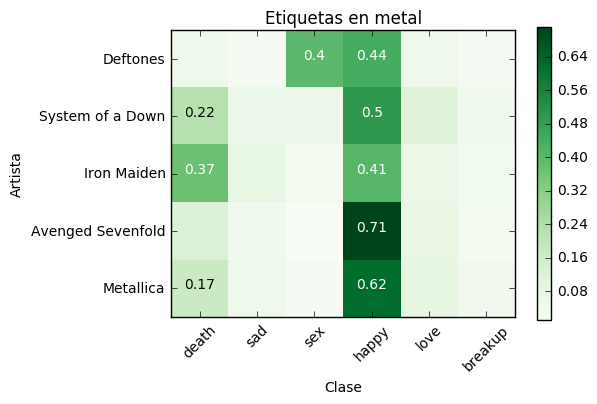

In [68]:
plot_confusion_matrix( np.array(artFin[6]),ART[6],clases,title="Etiquetas en %s"%G[6][0])